<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Deep-Learning/blob/main/iris_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [6]:
df = pd.read_csv('iris.csv')

In [7]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [11]:
# Encode target labels (Species)
label_encoder = LabelEncoder()
 # Convert 'setosa', 'versicolor', 'virginica' -> 0, 1, 2
df['class'] = label_encoder.fit_transform(df['class'])

In [13]:
# Features (X) and Target (y)
X = df.iloc[:, :-1].values  # All columns except 'Species'
y = df.iloc[:, -1].values   # 'Species' column

In [14]:
# One-hot encode the target variable
y = np.eye(3)[y]  # Convert to one-hot encoding (for 3 classes)

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))  # First hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))               # Second hidden layer
model.add(Dense(3, activation='softmax'))            # Output layer (3 classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3803 - loss: 1.0965 - val_accuracy: 0.2917 - val_loss: 1.1460
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4689 - loss: 1.0474 - val_accuracy: 0.3750 - val_loss: 1.1028
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6232 - loss: 0.9616 - val_accuracy: 0.4167 - val_loss: 1.0689
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6125 - loss: 0.9212 - val_accuracy: 0.4167 - val_loss: 1.0379
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5830 - loss: 0.9363 - val_accuracy: 0.4167 - val_loss: 1.0091
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5607 - loss: 0.8493 - val_accuracy: 0.4167 - val_loss: 0.9829
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6061 - loss: 0.7990 - val_accuracy: 0.4167 - val_loss: 0.9605
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4612 - loss: 0.8597 - val_accuracy: 0.

In [20]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9667 - loss: 0.0881
Test Accuracy: 0.9667


In [21]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding back to class labels
y_test_classes = np.argmax(y_test, axis=1)  # True class labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [22]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Loss Curve')

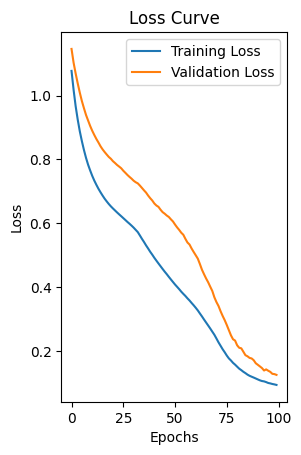

In [23]:
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

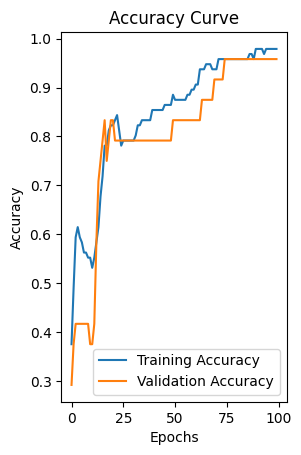

In [24]:
# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()